In [1]:
import pandas as pd
import json
from pandas.io.json import json_normalize #package for flattening json in pandas df
from PIL import Image

import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import sem
from scipy.stats import t

import statistics
import math


In [2]:
info_car2PPO_episode_1  = pd.read_json ('/home/aizaz/Desktop/PhD-20210325T090933Z-001/PhD/1_March_2023/Journal_Paper/examples/IRL_protest_result_straight/image/IRL_protest_result_imagenoise_straight.json', lines=True)
info_car2PPO_episode_1.columns = info_car2PPO_episode_1.columns.str.replace('noise', 'image noise')


In [3]:
info_car2PPO_episode_1['reward']

0       -10.488069
1       -11.372121
2       -10.021681
3        -9.513056
4        -8.844746
           ...    
29995    -5.609239
29996    -5.614710
29997    -5.707435
29998    -5.647913
29999    -5.685438
Name: reward, Length: 30000, dtype: float64

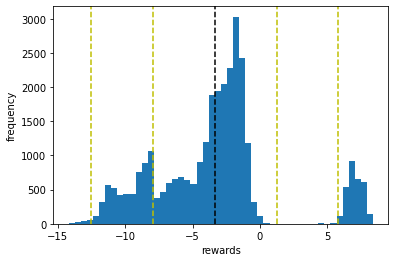

In [4]:
plt.hist(info_car2PPO_episode_1['reward'],bins=50,histtype='stepfilled')
plt.xlabel('rewards')
plt.ylabel('frequency')
m = statistics.mean(info_car2PPO_episode_1['reward'])
sd = statistics.stdev(info_car2PPO_episode_1['reward'])

plt.axvline(m, color='k', linestyle='dashed')
plt.axvline(m+sd, color='y', linestyle='dashed')
plt.axvline(m-sd, color='y', linestyle='dashed')

plt.axvline(m + 2*sd, color='y', linestyle='dashed')
plt.axvline(m - 2*sd, color='y', linestyle='dashed')

plt.show()

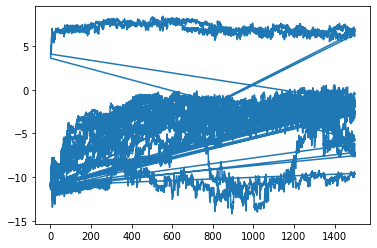

In [5]:
plt.plot(info_car2PPO_episode_1['state'], info_car2PPO_episode_1['reward'])


In [6]:
myMean = info_car2PPO_episode_1['reward'].mean()
myMean

-3.342070493629333

In [7]:
SE = sem(info_car2PPO_episode_1['reward'])
SE

0.02641505039144381

In [8]:
confLevel = 0.95

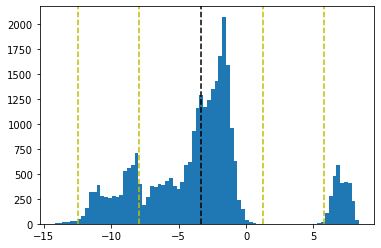

In [9]:
plt.hist(info_car2PPO_episode_1['reward'],bins=80)

m = statistics.mean(info_car2PPO_episode_1['reward'])
sd = statistics.stdev(info_car2PPO_episode_1['reward'])

plt.axvline(m, color='k', linestyle='dashed')
plt.axvline(m+sd, color='y', linestyle='dashed')
plt.axvline(m-sd, color='y', linestyle='dashed')

plt.axvline(m + 2*sd, color='y', linestyle='dashed')
plt.axvline(m - 2*sd, color='y', linestyle='dashed')
Confidence_interval = sd/math.sqrt(3982)
Confidence_interval = Confidence_interval*1.960


plt.show()

In [10]:
print ("Mean : ", m)
print ("Std Deviation : ", sd)
print ("1st Std Interval : ", m-sd , m+sd )
print ("2nd Std Interval : ", m - 2*sd , m + 2*sd )
print ("Confidence Interval : ", Confidence_interval)

print ("Confidence Interval : ", m - Confidence_interval , m + Confidence_interval)


Mean :  -3.3420704936293335
Std Deviation :  4.575220936247284
1st Std Interval :  -7.9172914298766175 1.2331504426179505
2nd Std Interval :  -12.4925123661239 5.8083713788652345
Confidence Interval :  0.14210766855480395
Confidence Interval :  -3.4841781621841372 -3.19996282507453


In [11]:
t.interval(0.65,info_car2PPO_episode_1['reward'],loc=m, scale=sd)


(array([nan, nan, nan, ..., nan, nan, nan]),
 array([nan, nan, nan, ..., nan, nan, nan]))

<AxesSubplot:xlabel='reward', ylabel='Density'>

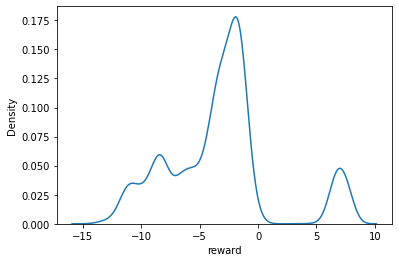

In [12]:
sns.kdeplot(info_car2PPO_episode_1['reward'],)


<AxesSubplot:xlabel='state', ylabel='Density'>

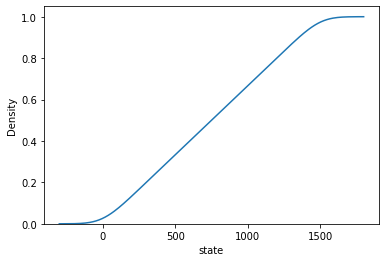

In [13]:
sns.kdeplot(
    data=info_car2PPO_episode_1['reward'], x=info_car2PPO_episode_1['state'],
    cumulative=True, common_norm=False, common_grid=True,
)

<AxesSubplot:xlabel='state', ylabel='reward'>

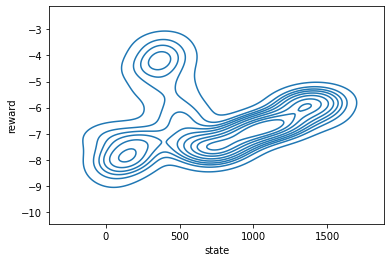

In [14]:
geyser = sns.load_dataset("geyser")
sns.kdeplot(data=info_car2PPO_episode_1, x="state", y="reward")

<AxesSubplot:xlabel='state', ylabel='reward'>

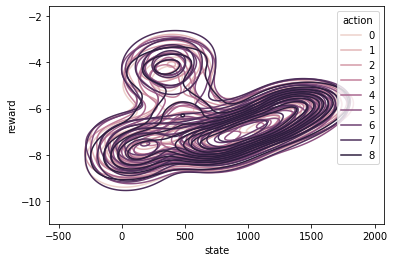

In [15]:
sns.kdeplot(data=info_car2PPO_episode_1, x="state", y="reward", hue="action"
)


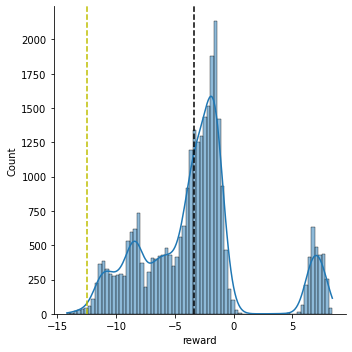

In [5]:
sns.displot(data=info_car2PPO_episode_1, x="reward", kde=True)
plt.axvline(m, color='k', linestyle='dashed')
# plt.axvline(m+sd, color='y', linestyle='dashed')
# plt.axvline(m-sd, color='y', linestyle='dashed')

# plt.axvline(m + 2*sd, color='y', linestyle='dashed')
plt.axvline(m - 2*sd, color='y', linestyle='dashed')

<AxesSubplot:xlabel='reward', ylabel='state'>

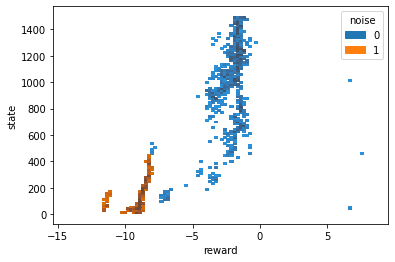

In [21]:
sns.histplot(
    info_car2PPO_episode_1, x="reward", y="state", hue="noise",
    bins=100 ,
    pthresh=.6, pmax=.95,
)

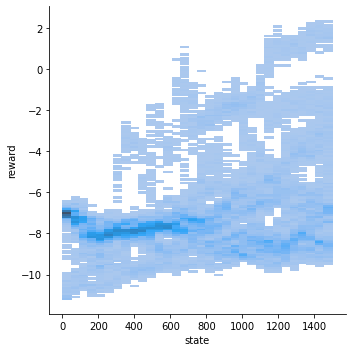

In [11]:
sns.displot(data=info_car2PPO_episode_1, x="state", y="reward")


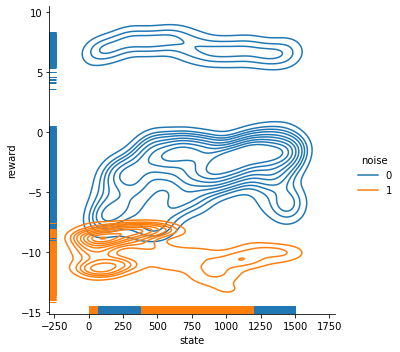

In [22]:
g = sns.displot(data=info_car2PPO_episode_1, x="state", y="reward", kind="kde", hue="noise", rug=True)


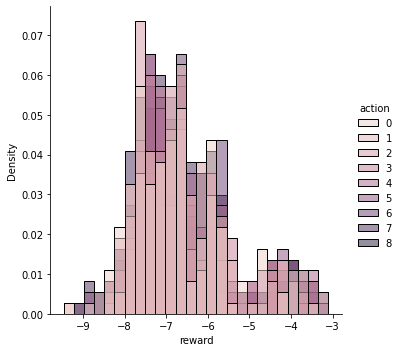

In [17]:

sns.displot(info_car2PPO_episode_1, x="reward", hue="action", stat="density")


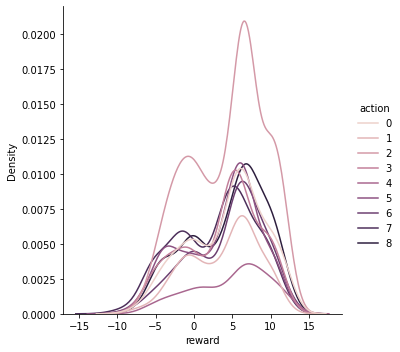

In [21]:
sns.displot(info_car2PPO_episode_1, x="reward", hue="action", kind="kde")


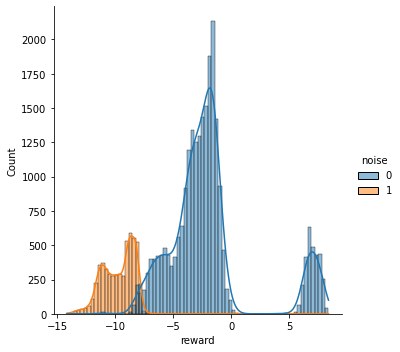

In [26]:
sns.displot(info_car2PPO_episode_1, x="reward", kde=True,  hue="noise")


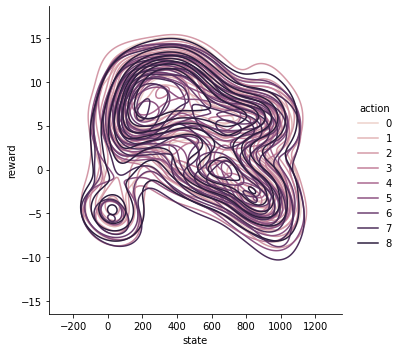

In [23]:
sns.displot(info_car2PPO_episode_1, x="state", y="reward", hue="action", kind="kde")


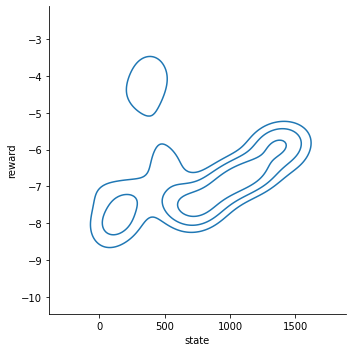

In [18]:
sns.displot(info_car2PPO_episode_1, x="state", y="reward", kind="kde", thresh=.2, levels=4)


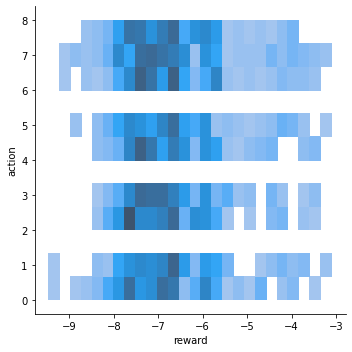

In [19]:
sns.displot(info_car2PPO_episode_1, x="reward", y="action", )


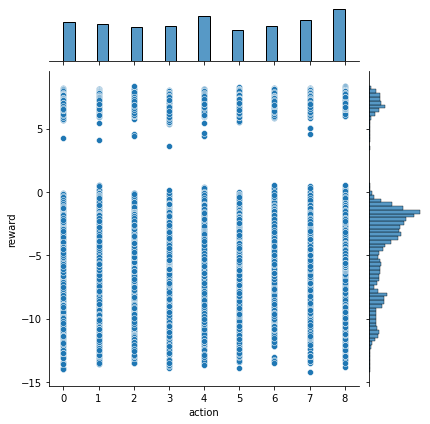

In [28]:
sns.jointplot(data=info_car2PPO_episode_1, x="action", y="reward")


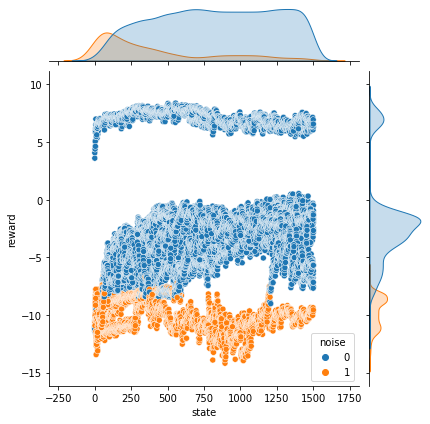

In [29]:
sns.jointplot(data=info_car2PPO_episode_1, x="state", y="reward", hue="noise")


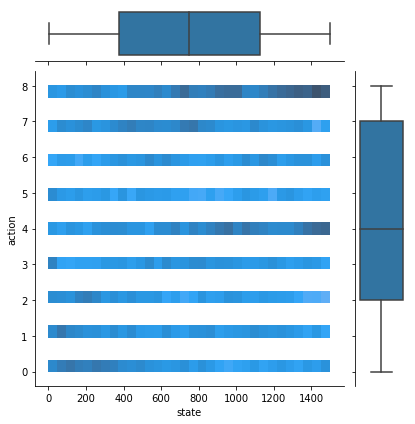

In [8]:
g = sns.JointGrid(data=info_car2PPO_episode_1, x="state", y="action")
g.plot_joint(sns.histplot)
g.plot_marginals(sns.boxplot)

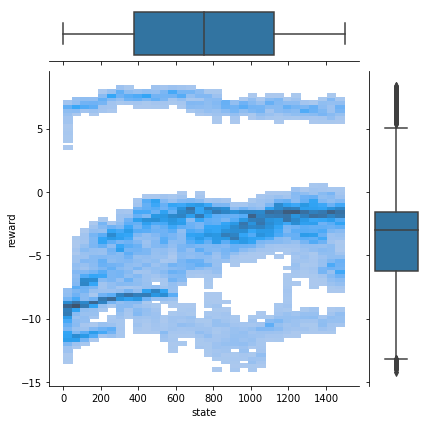

In [9]:
g = sns.JointGrid(data=info_car2PPO_episode_1, x="state", y="reward")
g.plot_joint(sns.histplot)
g.plot_marginals(sns.boxplot)

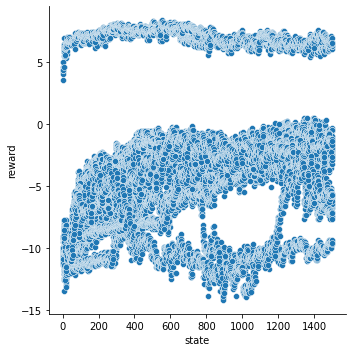

In [14]:
sns.relplot(data=info_car2PPO_episode_1, x="state", y="reward")
# sns.rugplot(data=info_car2PPO_episode_1, x="bill_length_mm", y="bill_depth_mm")

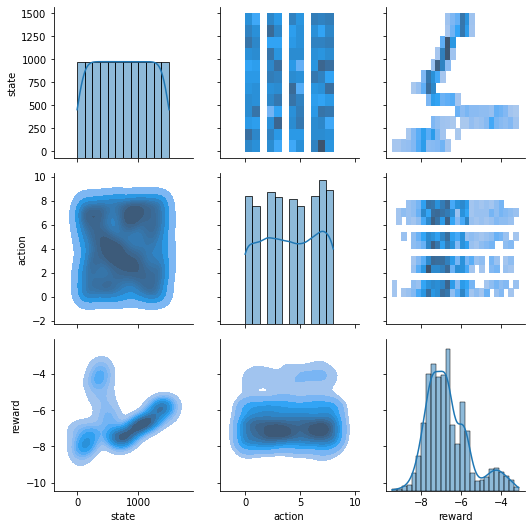

In [24]:
g = sns.PairGrid(info_car2PPO_episode_1)
g.map_upper(sns.histplot)
g.map_lower(sns.kdeplot, fill=True)
g.map_diag(sns.histplot, kde=True)

/home/aizaz/anaconda3/envs/MAD-ARL/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='reward'>

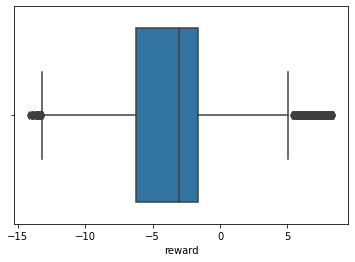

In [10]:
sns.boxplot(info_car2PPO_episode_1['reward'])


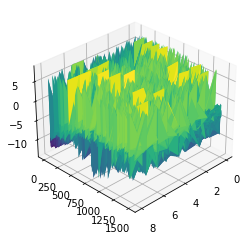

In [16]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
 
# Get the data (csv file is hosted on the web)
url = 'https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/data/volcano.csv'
data = pd.read_csv(url)
 
# Transform it to a long format
df=data.unstack().reset_index()
df.columns=["X","Y","Z"]
 

 
# Make the plot
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.view_init(30, 45)

ax.plot_trisurf(info_car2PPO_episode_1['action'], info_car2PPO_episode_1['state'], info_car2PPO_episode_1['reward'], cmap=plt.cm.viridis, linewidth=0.2)
plt.show()
 


In [3]:
# Episode 1

info_car1 = pd.read_json ('/home/aizaz/Desktop/PhD-20210325T090933Z-001/PhD/1_March_2023/Journal_Paper/examples/IRL_protest_result_straight/image/info_car1.json', lines=True)
info_car1 = pd.concat([info_car1.drop(['control'], axis=1), info_car1['control'].apply(pd.Series)], axis=1)


In [5]:
info_car1.shape

(30000, 35)

In [14]:
print((info_car1['collision_vehicles']!= 0).values.sum()/30000,"collision_vehicles")
print((info_car1['collision_other']!= 0).values.sum()/30000, "collision_other")
print((info_car1['intersection_offroad'] != 0).values.sum()/30000,"intersection_offroad")
print ((info_car1['intersection_otherlane'] != 0).values.sum()/30000, "intersection_otherlane")


0.0 collision_vehicles
0.0 collision_other
0.0 intersection_offroad
0.0 intersection_otherlane


In [7]:
SE_OS = sem(info_car1['intersection_otherlane'] != 0)
print (SE_OS)

0.0


In [5]:
print (info_car1['collision_vehicles'].idxmax())
print (info_car1['collision_other'].idxmax())
print (info_car1['intersection_offroad'].idxmax())

0
0
0


In [6]:
print (info_car1['collision_vehicles'].idxmax()*0.134)
print (info_car1['collision_other'].idxmax()*0.134)
print (info_car1['intersection_offroad'].idxmax()*0.134)

# 268
# 0.134

0.0
0.0
0.0


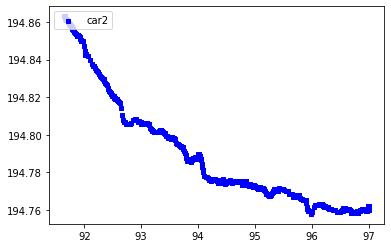

In [8]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(info_car1['x'][1501:3000], info_car1['y'][1501:3000], s=10, c='b', marker="s", label='car2')

plt.legend(loc='upper left')
plt.show()


### RQ2

In [22]:
print((info_car2PPO_episode_1['noise']!= 0).values.sum()/30000,"noise")


0.1796 noise


In [5]:
info_car2PPO_episode_1['noise'].value_counts()


0    24612
1     5388
Name: noise, dtype: int64

In [49]:
print (info_car2PPO_episode_1['noise'].idxmax())


1


In [8]:
mean_noise = []
for chunk in np.array_split(info_car2PPO_episode_1['noise'], 20):
    x = (chunk.idxmax())
    lower, upper = 0, 1500
    res = x % ( 1500 - 1 + 1) + 1
    mean_noise.append((res))
    print (x, " : ", res)
mean_noise = statistics.mean(mean_noise)
mean_noise

1  :  2
1501  :  2
3000  :  1
4501  :  2
6001  :  2
7501  :  2
9001  :  2
10501  :  2
12001  :  2
13501  :  2
15001  :  2
16501  :  2
18001  :  2
19500  :  1
21001  :  2
22500  :  1
24001  :  2
25501  :  2
27001  :  2
28501  :  2


1.85

### RQ3

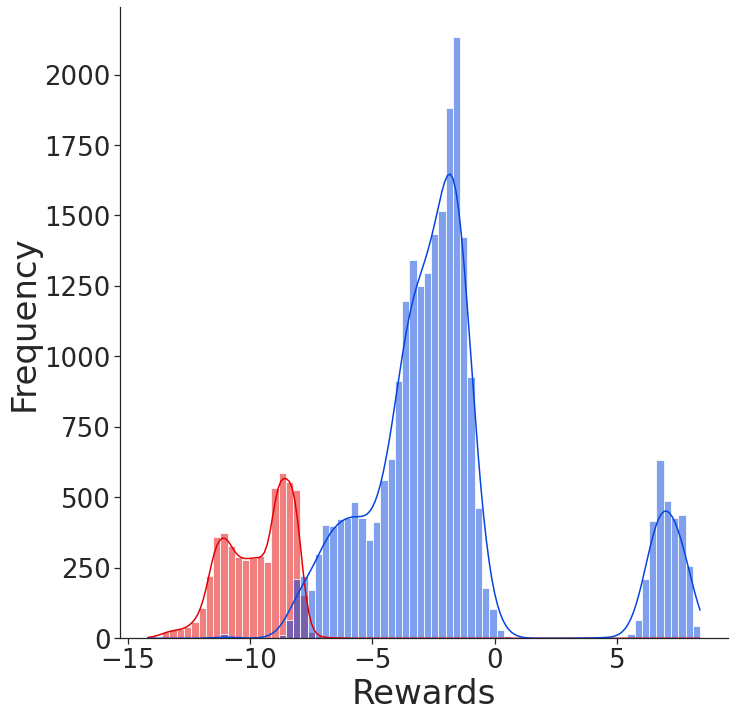

In [5]:
sns.reset_orig()
sns.set(font_scale = 1.5)
color = sns.color_palette()
sns.set_style(rc = {'axes.facecolor': '#FFFFFF'})
sns.set_style("ticks")
my_palette = sns.color_palette(["#0343DF", "#E50000"])



g = sns.displot(info_car2PPO_episode_1, x="reward", kde=True,  hue="image noise",palette=my_palette,height=10,color=color[0], legend=False)
# plt.axvline(-8, color='y', linestyle='dashed')
# g.fig.set_figwidth(8)
# g.fig.set_figheight(8)

g.set_axis_labels('Rewards','Frequency',fontsize=34)
# plt.xlabel('x-coordinates', fontsize=30)
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)

# plt.ylabel('y-coordinates', fontsize=30)

plt.savefig("RQ3_straight_9.jpg", bbox_inches = "tight")
# plt.show()

In [47]:
df = pd.DataFrame()
df['x'] = info_car1['x']
df['y'] = info_car1['y']
df['noise'] = info_car2PPO_episode_1['noise']

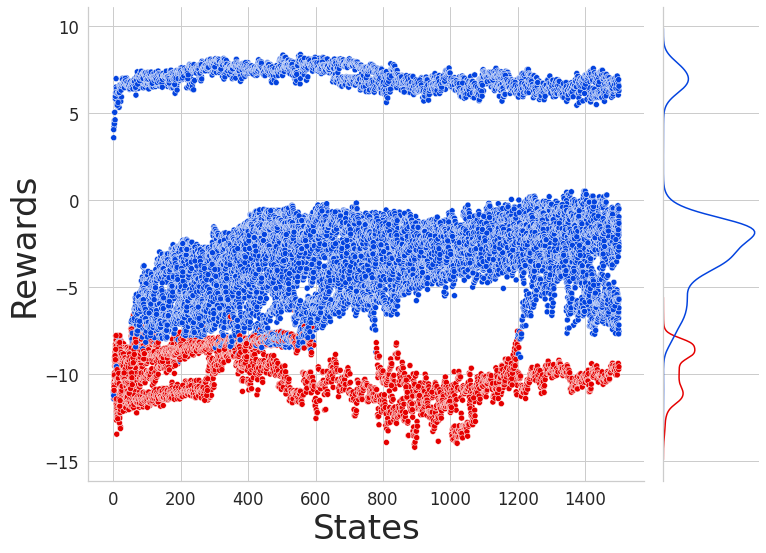

In [6]:
sns.reset_orig()
# sns.color_palette("rocket")
my_palette = sns.color_palette(["#0343DF", "#E50000"])

sns.set(font_scale = 1.5)

sns.set_style(rc = {'axes.facecolor': '#FFFFFF'})
sns.set_style("whitegrid")

g = sns.JointGrid(data=info_car2PPO_episode_1, x="state", y="reward", hue="image noise",palette=my_palette)
g.plot(sns.scatterplot, sns.kdeplot)
g.ax_marg_x.remove()
g.fig.set_figwidth(12)
g.fig.set_figheight(10)
g.set_axis_labels('States','Rewards',fontsize=34)

plt.xticks(fontsize=26)
plt.yticks(fontsize=26)


g.ax_joint.legend_.remove()
plt.savefig("RQ3_straight_10.jpg", bbox_inches = "tight")


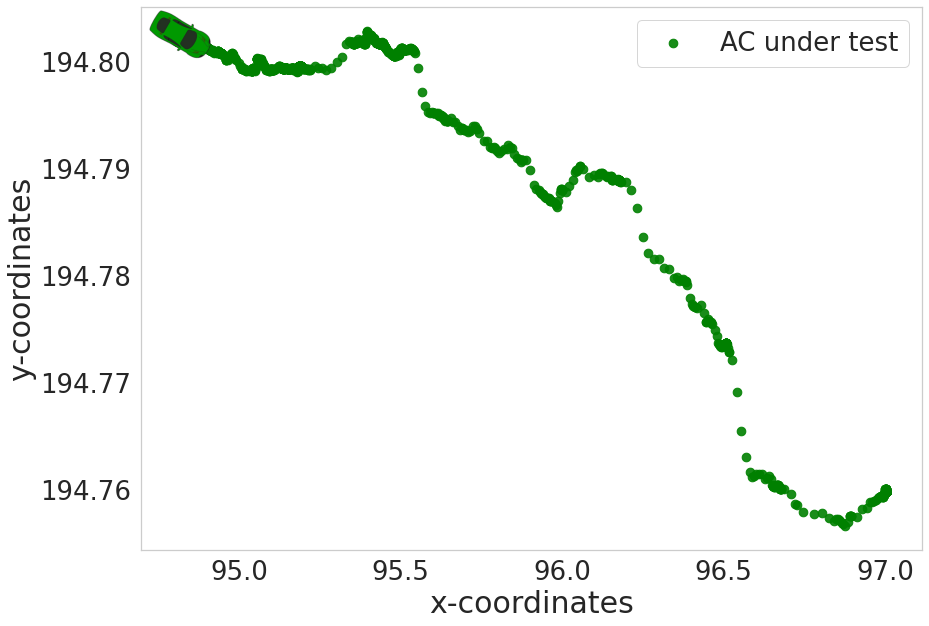

In [8]:


fig = plt.figure(figsize=(14,10))
ax1 = fig.add_subplot(111)

ax1.set_facecolor("white")
ax1.grid(False)



ax1.scatter(info_car1['x'][6001:7500], info_car1['y'][6001:7500], s=300, c='green', marker=".", label='AC under test',alpha =0.9,)

plt.legend(loc='upper right', fontsize=26)
plt.xlabel('x-coordinates', fontsize=30)
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)

plt.ylabel('y-coordinates', fontsize=30)

im = Image.open('image_1-removebg-preview.png')
newax = fig.add_axes([0.13, 0.8, 0.08, 0.08], anchor='NW', zorder=1)
newax.imshow(im)
newax.axis('off')
plt.savefig("RQ3_straight_3.jpg", bbox_inches = "tight")



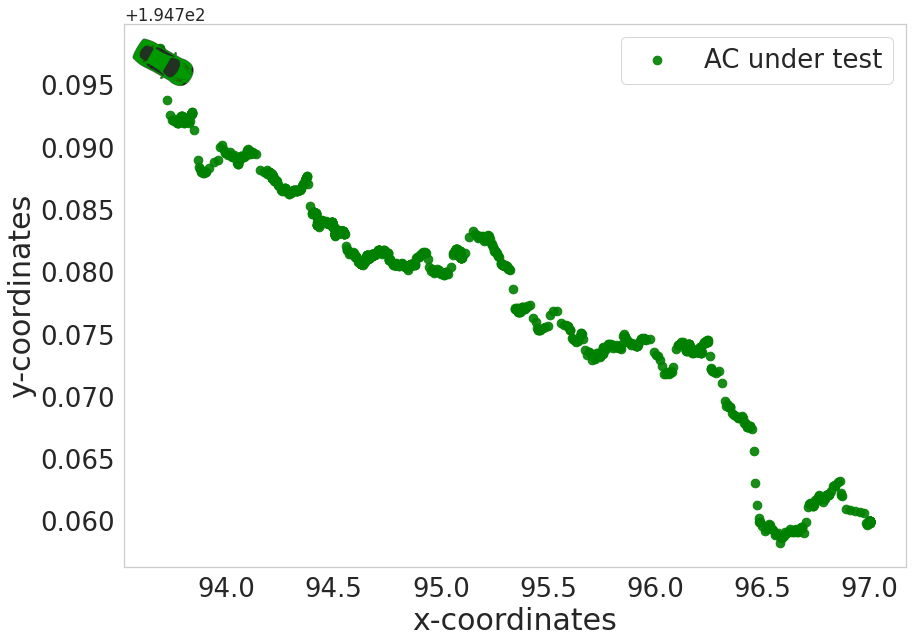

In [9]:
fig = plt.figure(figsize=(14,10))
ax1 = fig.add_subplot(111)

ax1.set_facecolor("white")
ax1.grid(False)



ax1.scatter(info_car1['x'][16501:18000], info_car1['y'][16501:18000], s=300, c='green', marker=".", label='AC under test',alpha =0.9,)

plt.legend(loc='upper right', fontsize=26)
plt.xlabel('x-coordinates', fontsize=30)
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)

plt.ylabel('y-coordinates', fontsize=30)

im = Image.open('image_1-removebg-preview.png')
newax = fig.add_axes([0.13, 0.785, 0.08, 0.08], anchor='NW', zorder=1)
newax.imshow(im)
newax.axis('off')
plt.savefig("RQ3_straight_4.jpg", bbox_inches = "tight")


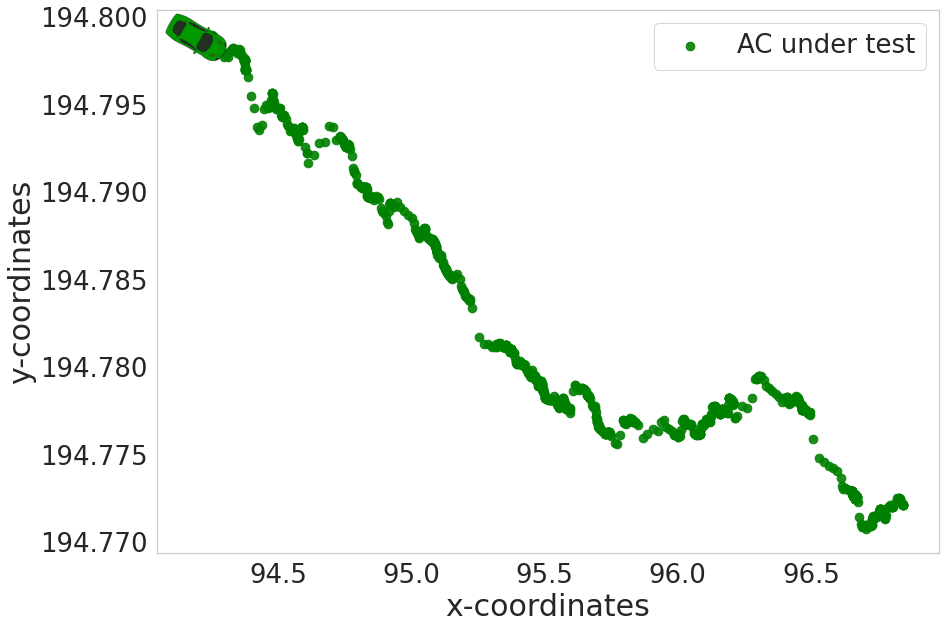

In [10]:
fig = plt.figure(figsize=(14,10))
ax1 = fig.add_subplot(111)

ax1.set_facecolor("white")
ax1.grid(False)



ax1.scatter(info_car1['x'][18110:19400], info_car1['y'][18110:19400], s=300, c='green', marker=".", label='AC under test',alpha =0.9,)

plt.legend(loc='upper right', fontsize=26)
plt.xlabel('x-coordinates', fontsize=30)
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)

plt.ylabel('y-coordinates', fontsize=30)

im = Image.open('image_1-removebg-preview.png')
newax = fig.add_axes([0.13, 0.8, 0.08, 0.08], anchor='NW', zorder=1)
newax.imshow(im)
newax.axis('off')
plt.savefig("RQ3_straight_5.jpg", bbox_inches = "tight")


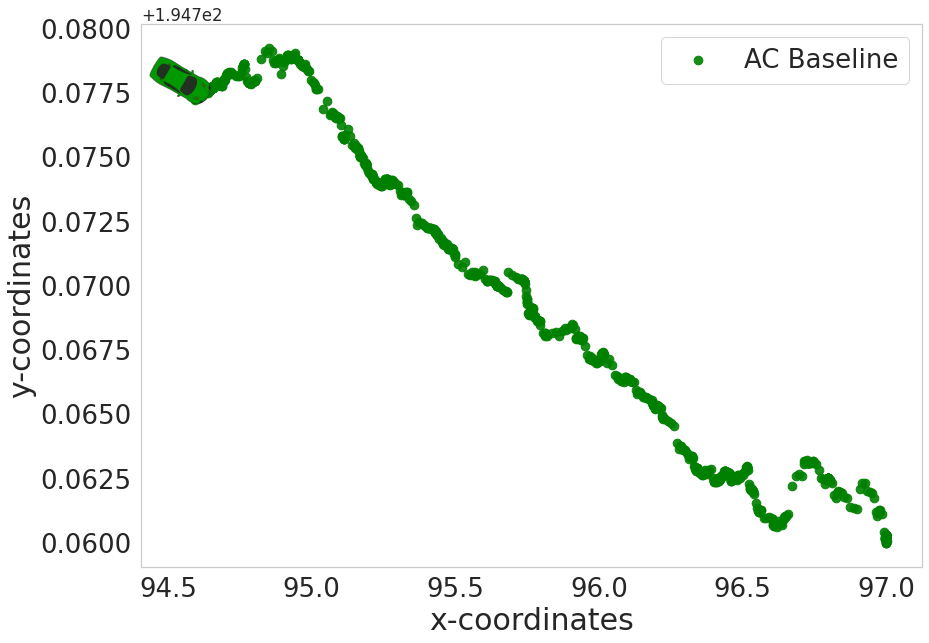

In [7]:
fig = plt.figure(figsize=(14,10))
ax1 = fig.add_subplot(111)

ax1.set_facecolor("white")
ax1.grid(False)



ax1.scatter(info_car1['x'][19501:21000], info_car1['y'][19501:21000], s=300, c='green', marker=".", label='AC Baseline',alpha =0.9,)


plt.legend(loc='upper right', fontsize=26)
plt.xlabel('x-coordinates', fontsize=30)
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)

plt.ylabel('y-coordinates', fontsize=30)

im = Image.open('image_1-removebg-preview.png')
newax = fig.add_axes([0.13, 0.76, 0.08, 0.08], anchor='NW', zorder=1)
newax.imshow(im)
newax.axis('off')

plt.savefig("RQ3_straight_6.jpg", bbox_inches = "tight")


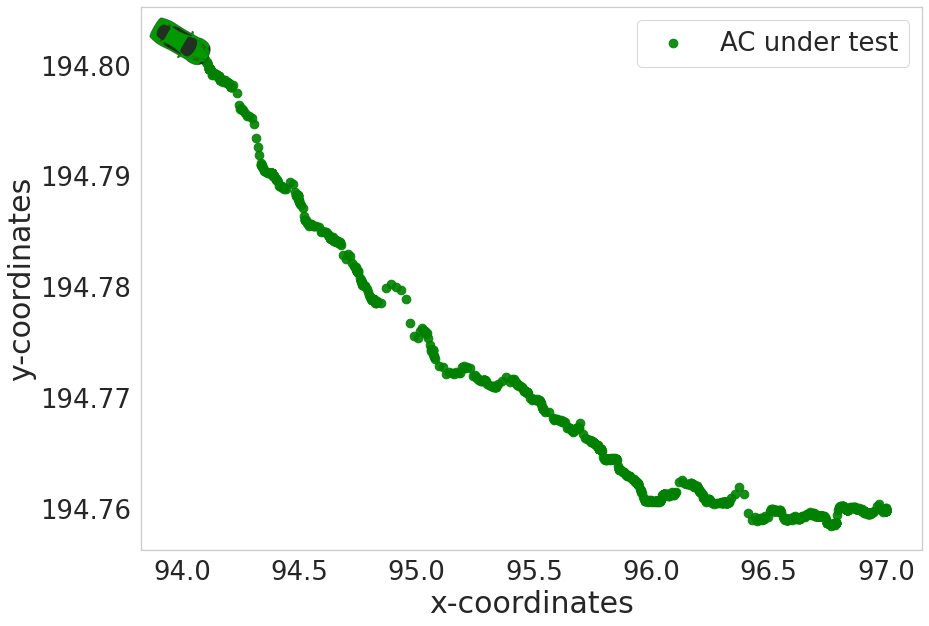

In [11]:
fig = plt.figure(figsize=(14,10))
ax1 = fig.add_subplot(111)

ax1.set_facecolor("white")
ax1.grid(False)



ax1.scatter(info_car1['x'][22501:24000], info_car1['y'][22501:24000], s=300, c='green', marker=".", label='AC under test',alpha =0.9,)

plt.legend(loc='upper right', fontsize=26)
plt.xlabel('x-coordinates', fontsize=30)
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)

plt.ylabel('y-coordinates', fontsize=30)

im = Image.open('image_1-removebg-preview.png')
newax = fig.add_axes([0.13, 0.79, 0.08, 0.08], anchor='NW', zorder=1)
newax.imshow(im)
newax.axis('off')
plt.savefig("RQ3_straight_7.jpg", bbox_inches = "tight")


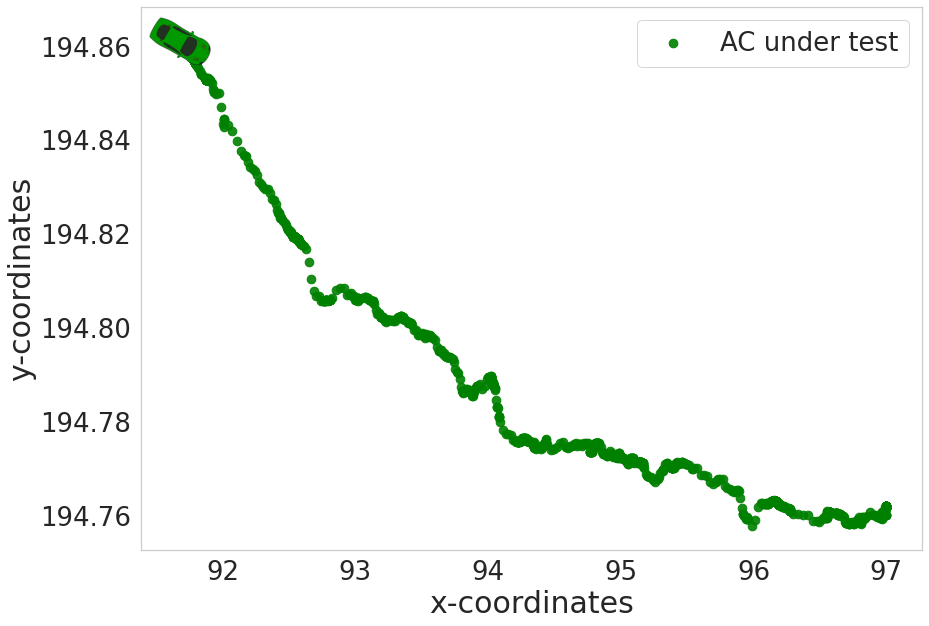

In [12]:
# fig = plt.figure(figsize=(8,6))
# ax1 = fig.add_subplot(111)

# ax1.scatter(info_car1['x'][1501:3000], info_car1['y'][1501:3000], s=300, c='g', marker=".", label='car1',alpha =0.4,)

# plt.legend(loc='upper right')
# plt.xlabel('x-coordinates', fontsize=22)
# plt.ylabel('y-coordinates', fontsize=22)

# plt.xticks(fontsize=16)
# plt.yticks(fontsize=16)

# plt.show()


fig = plt.figure(figsize=(14,10))
ax1 = fig.add_subplot(111)

ax1.set_facecolor("white")
ax1.grid(False)



ax1.scatter(info_car1['x'][1501:3000], info_car1['y'][1501:3000], s=300, c='green', marker=".", label='AC under test',alpha =0.9,)

plt.legend(loc='upper right', fontsize=26)
plt.xlabel('x-coordinates', fontsize=30)
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)

plt.ylabel('y-coordinates', fontsize=30)

im = Image.open('image_1-removebg-preview.png')
newax = fig.add_axes([0.13, 0.79, 0.08, 0.08], anchor='NW', zorder=1)
newax.imshow(im)
newax.axis('off')
plt.savefig("RQ3_straight_8.jpg", bbox_inches = "tight")



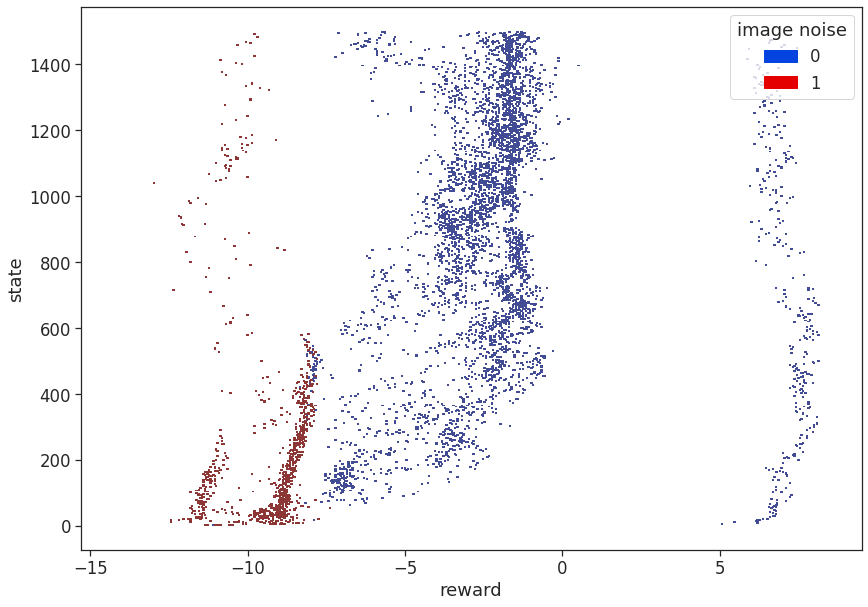

In [16]:
sns.reset_orig()
sns.set(font_scale = 1.5)

fig = plt.figure(figsize=(14,10))
my_palette = sns.color_palette(["#0343DF", "#E50000"])
sns.set_style(rc = {'axes.facecolor': '#FFFFFF'})
sns.set_style("ticks")
sns.histplot(
    info_car2PPO_episode_1, x="reward", y="state", hue="image noise", palette=my_palette,
    bins=500,
    pthresh=.6, pmax=.1, 
)
plt.savefig("RQ3_straight_11.pdf")


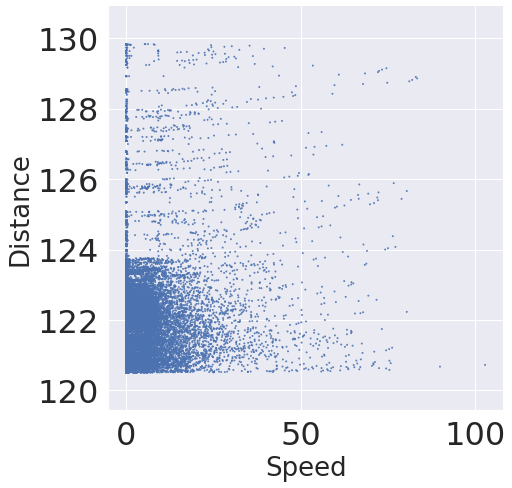

In [10]:
sns.reset_orig()
sns.set(font_scale = 1.5)

g = sns.JointGrid()

info_car1["forward_speed"] = abs(info_car1["forward_speed"])*100
x, y = info_car1["forward_speed"], info_car1["distance_to_goal_euclidean"]
sns.scatterplot(x=x, y=y, ec="b", fc="none", s=0.5, linewidth=1.2, ax=g.ax_joint)
# sns.histplot(x=x, fill=False, linewidth=1, ax=g.ax_marg_x)
sns.kdeplot(y=y, linewidth=2, ax=g.ax_marg_y)


g.fig.set_figwidth(8)
g.fig.set_figheight(8)

# joint.fig.tight_layout()

g.ax_marg_x.remove()
g.ax_marg_y.remove()

g.set_axis_labels('Speed','Distance',fontsize=26)
plt.tick_params(labelsize=32)
# plt.savefig('2.pdf')  

In [34]:
info_car2PPO_episode_1.corr()


,state,action,reward,noise
state,1.000000,0.093314,0.308585,-0.374196
action,0.093314,1.000000,0.050736,-0.085155
reward,0.308585,0.050736,1.000000,-0.651522
noise,-0.374196,-0.085155,-0.651522,1.000000


<AxesSubplot:>

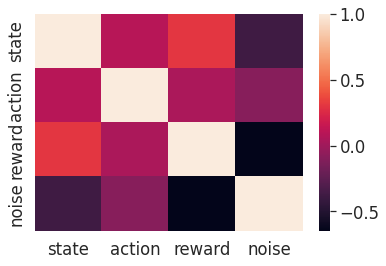

In [47]:
sns.heatmap(info_car2PPO_episode_1.corr())
